In [1]:
from tm_to_diagram import tm_to_diagram
from utils import rf
from simulateDfa import simulateDfa

## 9.9

### 問
図(テキストp200参照)のNFAをDFAに変換せよ.  

### 答
以下のDFA(`q9_9.dfa`)になる.

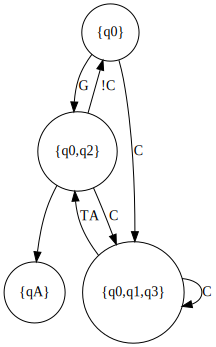

In [2]:
tm_to_diagram(rf('q9_9.dfa'))

## 9.10

### 問
$\Sigma = \{C, A, G, T\}$上の言語$L$は, 3個以上5個以下のGを含む文字列すべてからなる言語とする.  
$L$が正規言語であることを示せ.

### 答
$L$は以下のDFA(`q9_10.dfa`)によって判定されるので, 正規言語である.  
また, x=(C|A|T)\*G, y=(C|A|T)*とすると, $L$は"(xxxy)|(xxxxy)|(xxxxxy)"と正規表現される.

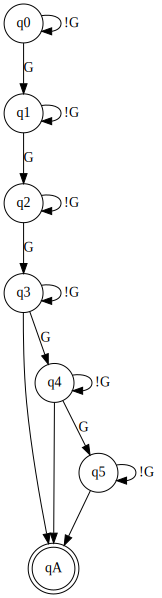

In [3]:
tm_to_diagram(rf('q9_10.dfa'))

In [4]:
# テスト
print(simulateDfa(rf('q9_10.dfa'), 'CCGATGAT'))  # 'G'2つ
print(simulateDfa(rf('q9_10.dfa'), 'AAGCAGGA'))  # 'G'3つ
print(simulateDfa(rf('q9_10.dfa'), 'GAGTGCCG'))  # 'G'4つ
print(simulateDfa(rf('q9_10.dfa'), 'GAGCGTGG'))  # 'G'5つ
print(simulateDfa(rf('q9_10.dfa'), 'GGGAGGAG'))  # 'G'6つ

no
yes
yes
yes
no


## 9.11

### 問
$\Sigma=\{C, A, G, T\}$上の言語$L$は, 部分文字列"TCA"が複数回(0個もOK)現れ, それらが0個以上の"G"で区切られているような文字列全てからなる言語とする.  
$L$を表す正規表現を見つけよ.  
例: $\epsilon$, "TCATCA", "GGGTCAGGTCAGGGG", "TCAGGGYCAGGTCATCAGGGG"

### 答
((TCA)\*G\*)\*

## 9.12

### 問
正規表現(T(GGA)\*\|C)\*と等価なNFAを見つけよ.  

### 答
以下のNFA(`q9_12.nfa`)と等価.

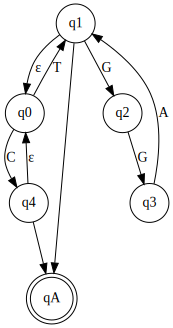

In [5]:
tm_to_diagram(rf('q9_12.nfa'))